In [1]:
#THIS File was run in google colab
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load dataset
import io
from google.colab import files

data = files.upload()


Saving winequality-red.csv to winequality-red.csv


In [5]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
display(wine_data.describe())
wine_data['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#checking for missing data
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#using Using random forrest to analyse the feature importance --- for feature reduction
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=12)
x = wine_data.drop(['quality'] , axis = 1)
wd = pd.get_dummies(wine_data)
model.fit(x, wine_data.quality)
display(model.feature_importances_)

array([0.05049791, 0.13604892, 0.04475298, 0.05247952, 0.05881777,
       0.0458654 , 0.07643178, 0.0515247 , 0.05821171, 0.14268737,
       0.28268191])

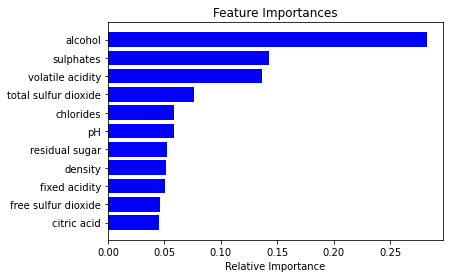

In [9]:
features = wd.columns
importances = model.feature_importances_
indices = np.argsort(importances)[:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
#Removing least important features
#del x['fixed acidity']
#del x['free sulfur dioxide']
#del x['citric acid']
x

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [18]:
#Encoding the quality label
le = LabelEncoder()
y = le.fit_transform(wine_data.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

In [20]:
#Data Over sampling using SMOTE
from imblearn.over_sampling import SMOTE

strategy = {0:1700, 1:1700, 2:1700, 3:1700, 4:1700, 5:1700}
oversample = SMOTE(sampling_strategy=strategy)
x, y = oversample.fit_resample(x, y)

In [21]:
x.shape


(10200, 8)

In [22]:
#splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
#transforming quality to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [25]:
#scaling features
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
#training ML
ann = tf.keras.models.Sequential(layers = None , name = None)
ann.add(tf.keras.layers.Input(shape = 8,))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


In [28]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [29]:
history = ann.fit(x_train, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (x_test,y_test_cat))

Epoch 1/150
255/255 [==============================] - 8s 14ms/step - loss: 1.5621 - accuracy: 0.3903 - val_loss: 1.2595 - val_accuracy: 0.5181
Epoch 2/150
255/255 [==============================] - 1s 5ms/step - loss: 1.1253 - accuracy: 0.5494 - val_loss: 1.0242 - val_accuracy: 0.5681
Epoch 3/150
255/255 [==============================] - 1s 4ms/step - loss: 0.9987 - accuracy: 0.5864 - val_loss: 0.9534 - val_accuracy: 0.6054
Epoch 4/150
255/255 [==============================] - 2s 9ms/step - loss: 0.9486 - accuracy: 0.6110 - val_loss: 0.9178 - val_accuracy: 0.6191
Epoch 5/150
255/255 [==============================] - 1s 4ms/step - loss: 0.9184 - accuracy: 0.6206 - val_loss: 0.9004 - val_accuracy: 0.6299
Epoch 6/150
255/255 [==============================] - 1s 4ms/step - loss: 0.8957 - accuracy: 0.6263 - val_loss: 0.8774 - val_accuracy: 0.6417
Epoch 7/150
255/255 [==============================] - 2s 6ms/step - loss: 0.8766 - accuracy: 0.6354 - val_loss: 0.8582 - val_accuracy: 0.650

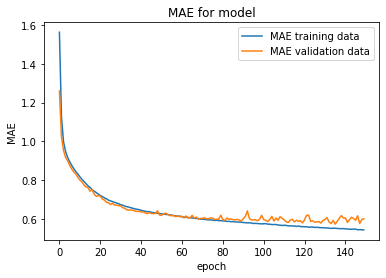

In [30]:
plt.plot(history.history['loss'], label='MAE training data')
plt.plot(history.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

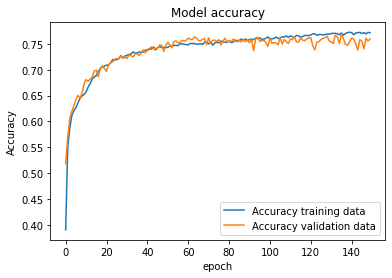

In [31]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()